In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
# Generating Data

X , y = make_regression(n_samples = 500 , n_features = 10 , n_informative = 5 , noise = 2 , random_state = 0)

print(X.shape , y.shape)

(500, 10) (500,)


In [3]:
pd.DataFrame(X).head()
n_features = X.shape[1]

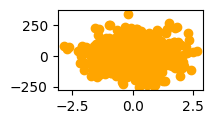

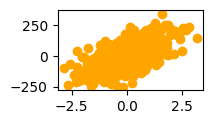

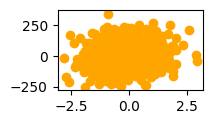

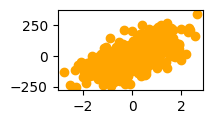

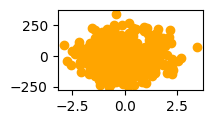

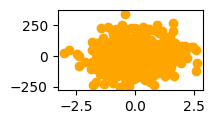

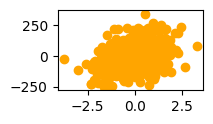

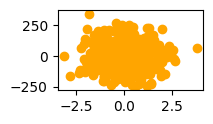

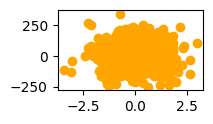

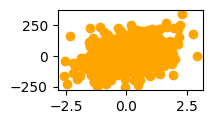

In [4]:
for i in range(0,10):
  plt.subplot(4,3,i+1)
  plt.scatter(X[:,i],y , color = "orange")
  plt.show()

In [5]:
# Feature Scaling

def featurescaling(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)

  return (X - u)/std

X = featurescaling(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [6]:
X.mean(axis = 0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [7]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

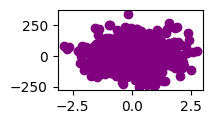

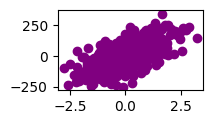

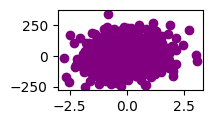

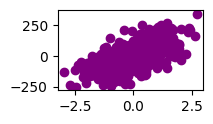

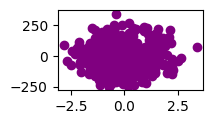

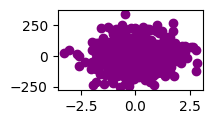

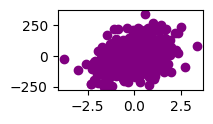

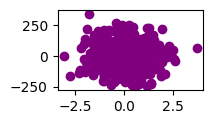

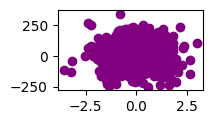

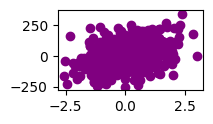

In [8]:
for f in range(0,10):
  plt.subplot(4,3,f+1)
  plt.scatter(X[: , f] , y , color = "purple")
  plt.show()

In [9]:
 Xtrain , Xtest , ytrain , ytest =  train_test_split(X , y , test_size = 0.3 , shuffle = False , random_state = 0)

In [10]:
Xtrain.shape

(350, 10)

In [11]:
# Adding one extra column in the X 

def preprocess(X):
  if X.shape[1] == n_features :

    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones , X))
  return X

In [12]:
# Defining the hypothesis
def hypothesis(X , theta):
  return np.dot(X , theta)

In [13]:
#Defining the Cost Function

def costfunction(X , y , theta):
  y_predict = hypothesis(X , theta)
  error = np.mean((y_predict - y)**2)

  return error

In [14]:
#Gradient Computation
def gradient(X , y , theta):
  y_predict = hypothesis(X , theta)
  grad = np.dot(X.T,(y_predict - y))

  m = X.shape[0]
  return grad/m

In [15]:
#Training the model

def train(X,y,learning_rate=0.1 , max_itrs = 100):
  n = X.shape[1]
  theta = np.random.randn(n)
  error_list = []

  for i in range (max_itrs):
    e = costfunction(X,y,theta)
    error_list.append(e)
    grad = gradient(X,y,theta)
    theta = theta - learning_rate*grad

  plt.plot(error_list)
  return theta

  

In [16]:
Xtrain = preprocess(Xtrain)
Xtest = preprocess(Xtest)
pd.DataFrame(Xtrain).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


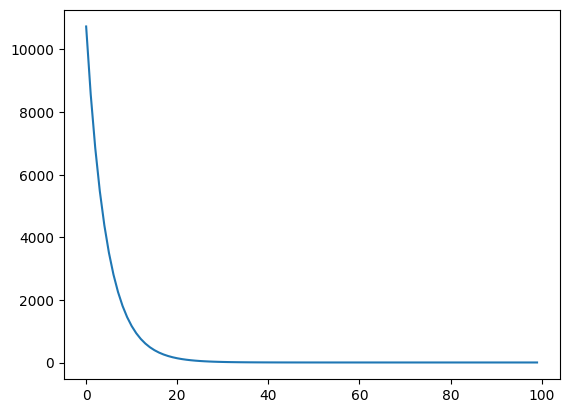

In [17]:
train1 = train(Xtrain , ytrain)

In [18]:
# Model Evaluation

def evaluation(y,y_predict):
  ymean = y.mean()
  num = np.sum((y-y_predict)**2)
  denom = np.sum((y - ymean)**2)

  return 1 - num/denom

In [19]:
y_predict = hypothesis(Xtest , train1)


In [20]:
evaluate = evaluation(ytest , y_predict)

In [21]:
evaluate

0.9995694643462114